# Convection-diffusion

The convection-diffusion equation describes processes where physical quantities are transported due to advection (convection) and diffusion. Common examples of such processes include solute transport (such as pollutants in bodies of water), chemical manufacturing and biological processes (such as bacterial migration). The general convection-diffusion equation is 
$$
\frac{\partial c}{\partial t} + \nabla \cdot \left(\mathbf{v} c \right) = \nabla \cdot \left(D \nabla c \right) + R,
$$
where 
* $c$ is the concentration,
* $D$ is the diffusivity,
* $\mathbf{v}$ is the velocity field,
* $R$ describes any sources or sinks of the quantity $c$.

For more details see [Wikipedia](https://en.wikipedia.org/wiki/Convection%E2%80%93diffusion_equation#Derivation_of_Einstein_relation "Convection-diffusion equation").

As this is just an illustrative example we will make a number of simplifying assumptions. 
* In general the diffusivity can vary in space and time however many problems can be investigated using a constant value for $D$ called the diffusion constant. 
* It is also okay to assume that there are no sources/sinks, $R=0$, so we are just considering the variation of an intial concentration profile. 
* Many fluids can be considered to be incompressible (for example water) so the velocity field has zero divergence, $\nabla \cdot \mathbf{v}$.
* If we are only interested in how the concentration varies in one spatial dimension the other two can be neglected.

Combining all of these assumptions we have the one-dimensional convection-diffusion equation
$$
\frac{\partial c}{\partial t} + u \frac{\partial c}{\partial x} = D \frac{\partial^2 c}{\partial x^2},
$$
where $u$ is the constant velocity in the $x$ direction. This equation determines the spatiotemporal variation of the concentration $c(x,t)$ which at time $t=0$ has the initial profile $c(x,0)=f(x)$ where $f(x)$ is a known function. Given the initial profile we would like to know how it evolves over time; we will find an approximate solution by discretising the equation and solving it numerically.  

### Boundary conditions 

We will consider the domain $x \in [x_{min},x_{max}]$ where $x_{min} < x_{max}$. At the ends of the domain we must prescribe conditions on the concentration. We could fix the value of the concentration at the ends of the domain but this is rather unphysical, instead we will state that there is no difference in the concentration across the end points. We specify the gradient condition
$$
\frac{\partial c}{\partial x} = 0 
$$
at $x=x_{min},x_{max}$. This is known as the no flux condition and is useful because it is as if no boundary exists and we are only looking at the part of the space that we are interested in. Boundary conditions involving a derivative of the function like this are known as Neumann boundary conditions.

## Finite-differences 

In order to discretise the derivatives in the equation we will use finite-difference approximations. The spatial domain is discretised on $N$ intervals such that the points are given by $x_i = i \Delta x$ where $\Delta x = (x_{max} - x_{min})/N$ and $i=0,1,\ldots,N$. The approximation to each $c(x,t)$ is given by $c_i^n = c(x_i, t^n)$

For the first-order spatial derivative we have the central difference
$$
\frac{\partial c}{\partial x} \approx \frac{c(x + \Delta x, t) - c(x - \Delta x,t)}{2 \Delta x} = \frac{c_{i+1}^n - c_{i-1}^n}{2 \Delta x},
$$
then for the second-order spatial derivative we have
$$
\frac{\partial^2 c}{\partial x^2} \approx \frac{c(x + \Delta x, t) - 2c(x,t) + c(x - \Delta x,t)}{\Delta x^2} = \frac{c_{i+1}^n - 2c_i^n + c_{i-1}^n}{\Delta x^2}.
$$

The time variable will be incremented in discrete intervals $\Delta t$ such that $t^n = n \Delta t$ for $n=0,1, \ldots, T$. The time derivative will be discretised using a simple forward difference such that
$$
\frac{\partial c}{\partial t} \approx \frac{c(x,t+\Delta t) - c(x,t-\Delta t)}{\Delta t} = \frac{c_i^{n+1} - c_i^n}{\Delta t}.
$$

Combining the approximations of the derivatives gives the discrete equation
$$
\frac{c_i^{n+1} - c_i^n}{\Delta t} + u \left( \frac{c_{i+1}^n - c_{i-1}^n}{2 \Delta x} \right) = D \left( \frac{c_{i+1}^n - 2c_i^n + c_{i-1}^n}{\Delta x^2} \right).
$$
Using the given initial conditions we can determine the concentration as subsequent time steps by rearranging the discrete equation for $c_i^{n+1}$ as follows:
$$
c_i^{n+1} = \frac{\Delta t}{\Delta x} \left(\frac{D}{\Delta x} - \frac{u}{2} \right) c_{i+1}^n + \left( 1 - \frac{2 \Delta t D}{\Delta x^2} \right) c_i^n + \frac{\Delta t}{\Delta x} \left( \frac{D}{\Delta x} + \frac{u}{2}\right) c_{i-1}^n.
$$
This difference equation applies to the internal spatial nodes $i=1,\ldots,N-1$, we need a different scheme at the ends of the domain.  
### Boundary conditions

At $x=x_{min}$ we have
$$
\frac{\partial c}{\partial x} \approx \frac{c_1^n - c_{-1}^n}{2 \Delta x} = 0,
$$
which implies that $c_{-1}^n = c_1^n$. So substituting the ghost node $c_{-1}^n$ into the internal nodes difference equation we obtain
$$
c_0^{n+1} = \left( \frac{\Delta t D}{\Delta x^2} \right) c_1^n + \left( 1 - \frac{2 \Delta t D}{\Delta x^2} \right) c_0^n.
$$
Then at $x=x_{max}$ we have
$$
\frac{\partial c}{\partial x} \approx \frac{c_{N+1}^n - c_{N-1}^n}{2 \Delta x} = 0,
$$
which implies that $c_{N+1}^n = c_{N-1}^n$. Again substituting into the internal nodes difference equation we obtain
$$
c_{N}^{n+1} = \left( 1 - \frac{2 \Delta t D}{\Delta x^2} \right) c_N^n +  \left( \frac{\Delta t D}{\Delta x^2} \right) c_{N-1}^n.
$$
These two difference equations for the ends of the domain complete the discretisation of the equations. This simple formulation is not the most accurate but it is sufficient for our purposes (a Crank-Nicoloson scheme would be better to improve stability). 

### Stability criteria

In order for our discretised equations to be numerically stable it is necessary to impose restrictions on both the spatial and temporal step size $\Delta x$ and $\Delta t$. It is required that 
$$ 
\Delta x < \frac{2D}{u} \hspace{0.5cm} \text{and} \hspace{0.5cm} \Delta t < \frac{\Delta x^2}{2D}.
$$
These conditions come from examining the truncation errors of the finite-difference approximations. If we wanted great accuracy in our calculations this would be a bit of a problem because the time step would need to reduce as the square of $\Delta x$ so computations would become very costly. In this case there are other schemes that we could use that would be more appropriate i.e. implicit or Crank-Nicolson schemes. 

**Now that we have everything we need let's implement this scheme using Julia.**

In [1]:
using LinearAlgebra, Plots

In [2]:
u  = 1                           # Wave speed
D  = 0.05                        # Diffusion constant
xmin = 0                         # Start of the spatial domain
xmax = 1                         # End of the spatial domain
N  = 50                          # Number of x intervals
dx = (xmax - xmin) / N           # x step
T  = 500                         # Number of time steps
dt = 0.002                       # t step
maxdx = 2 * D / u                # Maximum x step for stability
maxdt = ( dx^2 ) / ( 2 * D )     # Maximum t step for stability
if dx >= maxdx 
    println( "Warning! dx = ", dx, " >= max dx = ", maxdx )
else
    println( "dx = ", dx )
end
if dt >= maxdt
    println( "Warning! dt = ", dt, " >= max dt = ", maxdt )
else
    println( "dt = ", dt )
end
println( "tmax = ", dt * T )

dx = 0.02
dt = 0.002
tmax = 1.0


We also need to setup our initial conditions; we must choose the function $f(x)$ to define the initial concentration profile. For simplicity we will select a 'top-hat' function but feel free to choose a different one. 

In [3]:
function f(x)
    if 0.2 < x < 0.4
        return 1.0
    else
        return 0.0
    end
end

f (generic function with 1 method)

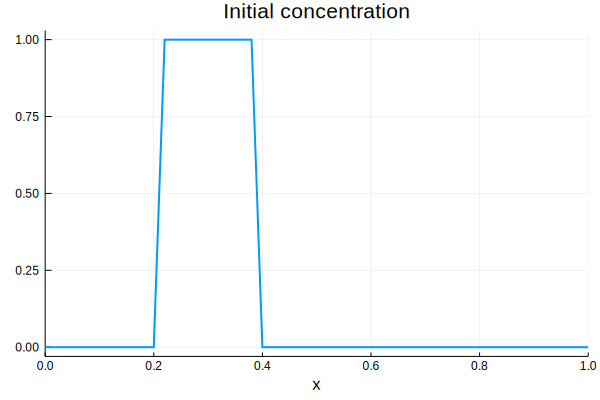

In [4]:
x = xmin:dx:xmax
c = map( f, x )
plot( x, c, xlim=(xmin,xmax), title="Initial concentration", xlabel="x" ,  legend=false, linewidth=2 )

In [5]:
a1 = ( dt / dx ) * ( ( D / dx ) - ( u / 2 ) ) 
a2 = 1 - 2 * dt * D / ( dx^2 )
a3 = ( dt / dx ) * ( ( D / dx ) + ( u / 2 ) ) 

cn = fill( 0.0, (T+1,N+1))
for i in 2:N
    cn[ 1, i ] = c[ i ]
end

for n in 1:T
    for i in 2:N
        cn[ n + 1, i ] = a1 * cn[ n, i + 1 ] + a2 * cn[ n, i ] + a3 * cn[ n, i - 1 ]
    end
    # Neumann boundary conditions
    cn[ n + 1, 1 ] = ( a1 + a3 ) * cn[ n, 2 ] + a2 * cn[ n, 1 ]
    cn[ n + 1, N + 1 ] = a2 * cn[ n, N + 1 ] + ( a1 + a3 ) * cn[ n, N ]
end


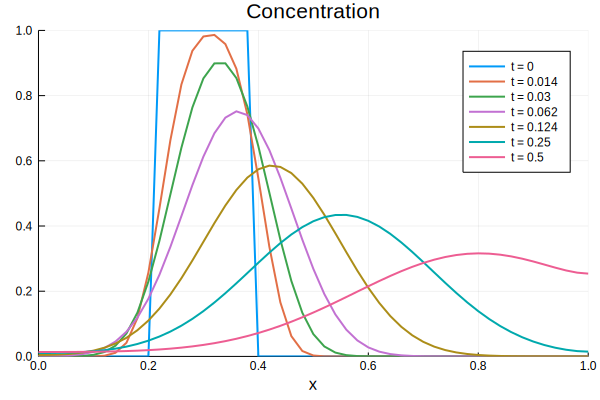

In [6]:
# Plot the concentration at a few different times
for i in 1:N+1
    c[ i ] = cn[ 1, i ]
end
fig = plot( x, c, xlim=(xmin,xmax), ylim=(0,1), title="Concentration", xlabel="x", label="t = 0", linewidth=2  )
for j in 6:-1:1
    index = floor( Int64, T/2^j ) + 1
    for i in 1:N+1
        c[ i ] = cn[ index, i ]
    end
    fig = plot!( x, c, xlim=(xmin,xmax), ylim=(0,1), title="Concentration", xlabel="x", label=string( "t = ", (index-1)*dt ), linewidth=2 )
end
display( fig )

We can see how the concentration is travelling along the  x  axis due to the advection caused by the wave speed  u . Also the initial hump in the concentration is gradually becoming flatter due to the diffusion parameterised by  D . Overtime the concentration will spread out fully and will tend to zero as the time tends towards infinity.

This very simple one-dimensional version of the convection-diffusion equation highlights many of its key features. Generalising the equation to two and three dimensions adds to the complexity of the discretisation and the computational expense but is not inherently more complicated. Complications can arise when including spatial and temporal variation in the velocity field and the diffusivity. I hope this demonstration has been informative, please contact me at www.oakhamilton.co.uk for more information. Below is an animation of the concentration as it varies over time.

┌ Info: Saved animation to 
│   fn = /home/tony/Desktop/jupyter-notebooks/Convection-diffusion.gif
└ @ Plots /home/tony/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/tony/Desktop/jupyter-notebooks/Convection-diffusion.gif")
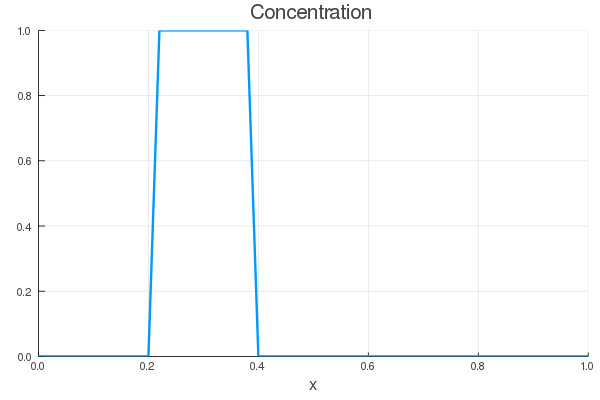

In [7]:
anim = @animate for n in 1:T
    for i in 1:N+1
       c[ i ] = cn[ n, i ]
    end
    plot( x, c, xlim=(xmin,xmax), ylim=(0,1), title="Concentration", xlabel="x", legend=false, linewidth=2 ) 
end
gif(anim, "Convection-diffusion.gif", fps = 1/dt )